## Solutions - Assignment 2

### Exercise 0

A cardioid is a specific mathematical curve. It comes up in things like directional antenna design, or the response of a microphone, that depends on the direction the microphone is pointing to. In particular, a directional microphone picks up sound in front very well, but does not pcik up sounds from the back side. 

You can look up this curve in various places -- even Wikipedia. 

In polar coordinates, it given by
$$ r = 1 - \sin\theta.$$

To plot, we just give the x,y coordinates from the polar form:
$$ x = r\cos\theta = (1-\sin\theta)\cos\theta,$$
$$ y = r\sin\theta = (1-\sin\theta)\sin\theta.$$

The rest is just coding.

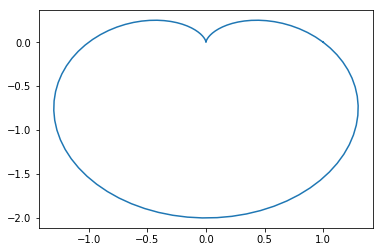

In [4]:
from matplotlib.pyplot import *
from numpy import *

theta = linspace(0,2*pi,100)
x = (1-sin(theta))*cos(theta)
y = (1-sin(theta))*sin(theta)
plot(x,y);


## Polar form

It is worth noting that PyPlot knows how to plot in polar form, which some people did directly. It is worth knowing about this. See the following code.


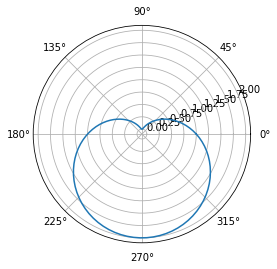

In [7]:
theta = linspace(0,2*pi,100)
r = 1-sin(theta)
polar(theta, r);


### Extra work

If you want a curve that looks more like a heart, you can lookup in Worlfram's MathWorld for some other heart-shaped curves. Here is a nice one:
$$ x	=	16\sin^3\theta,$$
$$ y	=	13\cos\theta-5\cos(2\theta)-2\cos(3\theta)-\cos(4\theta).$$

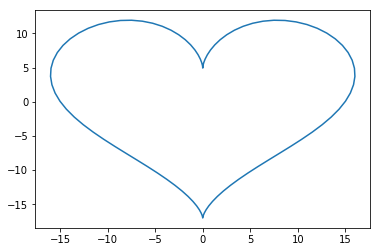

In [5]:
theta = linspace(0,2*pi,100)
x = 16*sin(theta)**3
y = 13*cos(theta)-5*cos(2*theta)-2*cos(3*theta)-cos(4*theta)
plot(x,y);


## Exercise 1.

Note the 4 parameters are T,R,k and m. (Period of the orbit, mean radius of the orbit, spring constant and mass.) Physical units are time, distance and mass, so we have 4-3=1 constant from Buckingham Pi.

Figuring out the units of k is important. From Newton's law, and the Hooke's law, we have Force = mass times acceleration = -k times distance.

This tells us the units of k are $mass/sec^2$. 

So a dimensionless combination is $kT^2/m =$ constant.

From this we get $$ T = c\sqrt{m/k}.$$

Does this make sense? Well, a heavy mass on a spring will move more slowly, so the period of orbit T should increase. So T increases as m increases, so that part makes sense. A stronger spring (k bigger) will move things more quickly, so T decreases as k increases. So yes, this makes sense. 

Does this mean the earth is not connected to the sun? Well, it is evidence that it is not. The earth and moon both go around the sun at about the same rate, and yet the moon is much lighter than the earth. Maybe the moon has a weaker spring attaching it to the sun, or maybe the moon only follows the earth and is not attached to the sun at all. But that would be weird!

NOTE: A few people used T,R,m and force F as "parameters." But force is not really a parameter, it is a variable, that changes with time. (In fact F = k times distances says the force changes as the distance changes with time.) By making the substitution F = kR, they got the "right answer" but this is blurring the distinction between the mean radius of the orbit (which is a constant) and the distance between the sun and early (which can vary as a function of time.) 



## Exercise 2

This is an exercise in expressing an systems of ODEs as a first order system, then formating some code to call up odeint (from SciPy), our numerical ode solver.

From Newton's law (mass times accelerations equals force) and Hooke's law (force is a constant times the displacement of the spring), we have
$$\begin{eqnarray}
m\frac{d^2x}{dt^2} &=& - k x, \\
m\frac{d^2y}{dt^2} &=& - k y. 
\end{eqnarray}
$$
To write this as a first order system, we define $\dot{x} = dx/dt, \dot{y} = dy/dt$ and then have
$$ 
\frac{d}{dt}\left[\begin{array}{c}x \\ \dot{x} \\ y \\ \dot{y} \end{array}\right] = 
\left[\begin{array}{c}
\dot{x} \\
\frac{-kx}{m}\\
\dot{y} \\
\frac{-ky}{m}
\end{array}\right].$$

In our code, we will use a 4-vector $X = [x,\dot{x},y,\dot{y}]$ and access the components as necessary. The RHS function just compute the derivative from the matrix formula above. 

To plot the result in the x-y plane, be sure you plot x and y values, not x and its derivative. This corresponts to the results matrix X[:,0] and X[:,2].

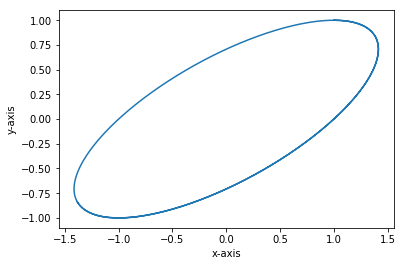

In [10]:
from numpy import *
from  matplotlib.pyplot import *
from scipy.integrate import odeint

def RHS(X,t,m,k):
    return X[1],-k*X[0]/m,X[3],-k*X[2]/m

X_init = array([1,1,1,0]) # Initial values for position and velocities
t_arr = linspace(0,10,1000)
m = 1 #kg
k = 1 #N/m
X = odeint(RHS,X_init,t_arr, args=(m,k))

plot(X[:,0],X[:,2]);
xlabel("x-axis"); ylabel("y-axis");


## Exercise 3

The pipe example.

**Part 1:** Show there are 3 physical units, so by Buckingham Pi, there are 5-3 = 2 independent, unitless quantities $\Pi_1, \Pi_2.$ Find them. 

(Hint: one might be the Reynolds number. Always a good choice.)

**Part 2:** Since there are two $\Pi's$, we can expect to "solve the problem" in the form
$$\Pi_2 = F(\Pi_1)$$
for some unspecified function $F$. 

Use this approach to to find the constant pressure gradient $P'$ as a product of powers of $D,\rho,U$ and $F(\Pi_1).$

#### Solution

Remember, the Buckingham Pi theorem has two parts. First, is that you can find a certain number of dimensionless parameter.  And second, if there is a formula relating input parameters to an output result (like mass and spring constants determining the period of oscillation), then there is an equivalent formula using only dimensionless parameters. 

In this problem, there are 5 parameters and 3 physical units, so we expect 5-3 = 2 dimensionless parameters. Since we expect that the pressure drop in the pipe can be determined by the other 4 parameters (eg a high velocity means there is a lot of pressure pushing the fluid), we expect to be able to solve one dimensionless parameter in terms of the other. That is, we expect a formula of the form
$$ \Pi_2 = F(\Pi_1)$$,

where $\Pi_1, \Pi_2$ are the dimensionless parameters. 

**Part 1**:

The 5 physical parameters given have the following units
- $D$, the diameter of the pipe (eg meters)
- $\rho$, the density of the fluid (eg grams per centimeters cubed)
- $\mu$, the dynamic viscosity of the fluid (grams per centimeter*second -- look it up!)
- $U$, the average velocity of the fluid (meters per second)
- $P' = dP/dx$, the gradient of the pressure 

Maybe we have to work a bit for $dP/dx.$ Pressure is a force per unit area. With dx, this differential is in units of force per unit volume. So this is a mass times an acceleration, divided by a length cubed. Net result is, the units are a mass divided by (time squared, length squared). 

Anyhow, so we have 3 basic physical units (distance, time, mass) and our matrix of the powers is

| D |$\rho$ | $\mu$ | U| P' | |
| --- | --- | --- | --- | --- | --- |
| 1 | -3 | -1 | 1 |  -2 | length
| 0 | 1  |  1 | 0 |   1 | mass
| 0 | 0  | -1 | -1 | -2 | time

You might notice this matrix is basically in row-echelon form, so it is eary to read off the kernel vectors. Looking at the forth column, if we put in a 1 at the forth element of a column vector, and a zero at the fifth element, we can easily solve this matrix equation by back-substitution:
$$\left[
\begin{array}{rrrrr}
1 & -3 & -1 & 1 & -2 \\
0 &  1 &  1 & 0 &  1 \\
0 &  0 & -1 &-1 & -2
\end{array}
\right]
\left[
\begin{array}{r}
x_1 \\
x_2 \\
x_3 \\
1 \\
0
\end{array}
\right] = 0
$$
to find this vector
$$\left[
\begin{array}{r}
1 \\
-1 \\
-1 \\
1 \\
0
\end{array}
\right]
$$
in the kernel. Of course, reading off the powers, we see the first dimensionless parameter is 
$$ \Pi_1 = \frac{D\mu U}{\rho}$$
which is just Reynolds number.

To get another vector in the kernel, we COULD put the fifth element equation to 1, and solve 
$$\left[
\begin{array}{rrrrr}
1 & -3 & -1 & 1 & -2 \\
0 &  1 &  1 & 0 &  1 \\
0 &  0 & -1 &-1 & -2
\end{array}
\right]
\left[
\begin{array}{r}
x_1 \\
x_2 \\
x_3 \\
0 \\
1
\end{array}
\right] = 0
$$
to find this vector
$$\left[
\begin{array}{r}
3 \\
1 \\
-2 \\
0 \\
1
\end{array}
\right]
$$
in the kernel. This corresponds to the dimensionless parameter
$$ \frac{D^3 \rho P'}{\mu^2}.$$

But that is not what we want!! The problem said to solve for P' in terms of U, D, $\rho$ and the Reynold's number. 

So instead, we should solve 
$$\left[
\begin{array}{rrrrr}
1 & -3 & -1 & 1 & -2 \\
0 &  1 &  1 & 0 &  1 \\
0 &  0 & -1 &-1 & -2
\end{array}
\right]
\left[
\begin{array}{r}
x_1 \\
x_2 \\
0 \\
x_4 \\
1
\end{array}
\right] = 0.
$$ 
Notice the non-zero entries in the vector correspond to the variables, D, $\rho$, U, P', which are the ones we want. 
(See the statement of the problem, part 2.)

Again, solve by back-substitution and we get 
$$\left[
\begin{array}{r}
1 \\
-1 \\
0 \\
-2 \\
1
\end{array}
\right]
$$
in the kernel. This corresonds to the dimensionless parameter
$$\Pi_2 = \frac{DP'}{\rho U^2}.$$

#### Part 2

Now we write
$$\Pi_2 = F(\Pi_1)$$
where $F$ is some unknown function. This gives us
$$\frac{D P'}{\rho U^2} = F(Re),$$
where $Re$ is the Reynolds numbers. Solving for P', we have
$$ P' = \frac{\rho U^2}{D}F(Re).$$

This says, for instance, if you keep the Reynolds number fixed, then the pressure drop increases like the square of average velocity. 

## Exercise 4

Find an expansion for the roots of the cubic
$$\epsilon x^3 + x -1 = 0$$
for small values of $\epsilon.$ Find three (non-zero) terms in each expansion.

NOTE: YOU HAVE ALL THIS TOOLS IN PYTHON, LIKE GRAPHING. USE THEM!

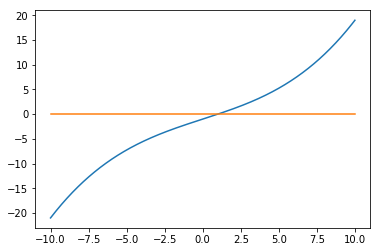

In [16]:
## Plot this for small epsilson >0. Notice only one root.

eps = .01
x =linspace(-10,10,1000)
y = eps*x**3 + x - 1
plot(x,y,x,0*x);

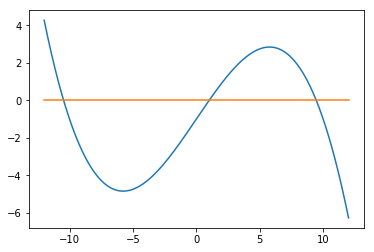

In [15]:
## Plot this for small epsilson < 0. Notice three roots.

eps = -.01
x =linspace(-12,12,1000)
y = eps*x**3 + x - 1
plot(x,y,x,0*x);

Note for $\epsilon = 0$ there is a root at $x = 1$.

When $\epsilon >0$ the polynomial $$\epsilon x^3 + x -1 = 0$$ has positive derivative, so there can be only one root. We expand the solution in powers of $\epsilon$, so $$x = 1 + x_1 \epsilon + x_2\epsilon^2 + \cdots,$$
and plugging into the polynomial gives
$$\epsilon (1 + x_1 \epsilon + x_2\epsilon^2 + \cdots)^3 + (1 + x_1 \epsilon + x_2\epsilon^2 + \cdots) - 1 = 0.$$

The 0-th order terms cancel, so let's just do order 1, then order 2. 

$$\epsilon + 3 x_1 \epsilon^2 + \cdots + x_1\epsilon + x_2\epsilon^2  + \cdots= 0. $$

So $x_1 = -1,$ and $x_2 = -3x_1 = -3.$

Our expansion (for $\epsilon > 0$) is
$$x = 1 - \epsilon + 3\epsilon^2 + \cdots.  $$

For $\epsilon<0$, the function will have three roots. One will be near $x=1$ and will have exactly the same expansion as above. The reason we get two other roots is that the polynomial is increasing at the root near $x=1$ (since the derivative is approx equal to 1), and yet we know the cubic goes to plus infinity on the left of the x-axis, and to minus infinity of the right side, so it has to cross the x-axis at two other places.

So let's find those two other places. There, $x$ will be large, so we have $\epsilon x^3 + x - 1 \approx \epsilon x^3 + x \approx 0$, so $x^2$ is roughly the size of $-1/\epsilon$. 

We can expand $x$ in powers of $\sigma = \sqrt{-\epsilon}$, which is another small parameter. We write
$$x = x_{-1}\sigma^{-1} + x_0 + x_1\sigma + \cdots$$ and insert into the polynomial (using $\epsilon = -\sigma^2$) to get
$$-\sigma^2(x_{-1}\sigma^{-1} + x_0 + x_1\sigma + \cdots)^3 + (x_{-1}\sigma^{-1} + x_0 + x_1\sigma + \cdots) -1 = 0.$$
Expanding up to power $\sigma$ gives
$$-x_{-1}^3\sigma^{-1} - 3x_{-1}^2 x_0 -3 x_{-1}x_0^2\sigma -3 x_{-1}^2x_1\sigma+ \cdots 
+ x_{-1}\sigma^{-1} + x_0 + x_1\sigma + \cdots - 1 = 0.$$

Equating coefficients of $\sigma^{-1}$ gives $-x_{-1}^3 + x_{-1} = 0$ so $x_{-1} = \pm 1. $ (We ignore the zero solution.)

Equating coefficients of $\sigma^{0}$ gives $-2x_0 - 1 = 0, $ so $x_0 = -1/2$. 

Equating coefficients of $\sigma^{1}$ gives $-3 x_{-1}x_0^2 -2 x_1 = 0, $ so $x_1 = \mp 3/8$. 

So our two expansions are
$$x = \frac{1}{\sigma} - 1/2 - \frac{3}{8}\sigma + \cdots$$
and
$$x = \frac{-1}{\sigma} - 1/2 + \frac{3}{8}\sigma + \cdots$$
and of course the expansion near $x=1$ from above, 
$$x = 1 - \epsilon + 3\epsilon^2 + \cdots.  $$

## Exercise 5

**Set-up:**
The logistic equation (from calculus)
$$\frac{du}{dt} = k u(1-u)$$
is a simple model for population growth when there are limited resources. For instance, think of rabbits in a field of grass that they can eat. When there are just a few rabbits ($u$ close to zero), the equation becomes
$$\frac{du}{dt} \approx k u,$$
and we get exponential growth. When $u$ is close to 1, the rabbits run out of grass, and the equation becomes
$$\frac{du}{dt} \approx \sigma k u,$$
which gives slow growth or slow decay towards $1$, depending on whether $\sigma = 1-u$ is positive or negative.

**Exercise:**
Now, suppose the problem has a periodic perturbation (say due to seasons of grass growing):
$$\frac{du}{dt} = k u(1 + \epsilon\cos(t) -u).$$
Find a periodic solution $u = 1 + \epsilon u_1(t) + \cdots $ which is correct to $O(\epsilon)$. That is, the error is of $O(\epsilon^2)$.

**Solution**

Don't work too hard!

We write $u = 1 + \epsilon u_1(t) + \cdots $  and plug it into the ODE to get
$$\epsilon \dot{u}_1(t) + \cdots = k(1 + \epsilon u_1(t) + \cdots )(1- 1 - \epsilon u_1(t) - \cdots +\epsilon \cos t).$$ Taking just the order $\epsilon$ terms we get
$$\epsilon \dot{u}_1(t) = k (-\epsilon \dot{u}_1(t) + \epsilon\cos t),$$
and removing the common factor $\epsilon$ and moving the $u_1$ to the LHS, we get a first order, linear, inhomogeneous DE for $u_1$:
$$\dot{u}_1 + ku_1 = k  \cos t.$$
We know the solution to the homogeneous equation will be $C e^{-kt}$ but we will ignore this, since we want a periodic solution. The particular solution (given that the RHS has a cosine in it) will be a linear combination of sines and cosines, so we write
$$u_1(t) = A\cos t + B\sin t$$ and the DE becomes
$$ (-A\sin t + B\cos t) +k(A\cos t + B\sin t) = k\cos t.$$
This gives us the linear equations $-A + kB = 0, B + kA =k$ so we solve it and conclude
$$A = \frac{k^2}{1+k^2}, B = \frac{k}{1+k^2}.$$

Our periodic solution is then
$$ u(t) = 1 + \epsilon \left( \frac{k^2}{1+k^2}\cos t +  \frac{k}{1+k^2}\sin t \right).$$

Remembering our trig identities, we can write this as
$$ u(t) = 1 + \epsilon \frac{k}{\sqrt{1+k^2}}\cos (t-t_0),$$
where $t_0 = \arctan(1/k).$ (Recall $\cos(t-t_0) = \cos t_0 \cos t + \sin t_0 \sin t$, so solve that for $t_0$, using the coefficients above.)

Which just says that the population size of the bunnies lags behind the food supply by a time $t_0$, which depends on the growth constant $k$.


# Exercise 6

This is really just an exercise in calculus. It seems we all learned calculus in different ways, so it is important to make sense of it, however you can.

If we write $u = \int^T k(s) ds$ we can think of this as the antiderivative of $k$ evaluated at some point $T$. There is no lower limit indicated on the integral, so we can just insert one. So let's write this out, say with $K(T) = \int_a^T k(s) ds - K(a).$ Its derivative is then $\frac{dK}{dT} = k$

Now, we want to think of $u$ as a function of three spatial variables, x,y,z, so we write $u(x,y,z) = K(T(x,y,z))$, where we now have identified $T$ as a function of these three variables.

From the chain rule, we have $\frac{d u}{dx} = \frac{dK}{dT}\frac{dT}{dx}= k\frac{dT}{dx}$ and more generally,
$$ (\frac{d u}{dx}, \frac{d u}{dy}, \frac{d u}{dz}) 
= (k\frac{dT}{dx},k\frac{dT}{dy},k\frac{dT}{dz}) = 
k(\frac{dT}{dx},\frac{dT}{dy},\frac{dT}{dz}).$$

Note that $k$ here is a **function** and not a constant.

In terms of gradients, we have
$$\nabla u = k\nabla T,$$
and thus
$$\nabla^2 u = \nabla\cdot ( k \nabla T) = 0, $$
as desired. 
